# Simple Outdoors Test

## Objective

After evaluating the basic distance measuring capabilities of the TOF sensor, the objective of this notebook is to determine the sensor's effectiveness in detecting and measuring the distances of passing cars in a practical setting.

## Overview

- First, I started off by mounting the sensor on a stationary bike, and positioning it along a road to measure passing cars. I first wanted to determine the effectiveness of the sensor at detecting pass cars in a more controlled environment.
- Next, with the same set up, the bike was pedalled down different roads and the data from overtaking cars was collected. Being able consistently and reliably detect vehicles in this setting was the end goal of the experiment.

### Code

- As per the previous notebook, much of the code has been split into separate Python modules.
- [`data_loader`](./data_loader.py) contains helper functions to extract the data from the necessary files.
- [`graphing`](./graphing.py) contains helper functions to plot the graphs below.
- [`preprocessing`](./preprocessing.py) contains utility functions that manipulate the data.

In [17]:
import pathlib

import matplotlib.pyplot as plt

from data_loader import get_data_from_txt
from graphing import OutdoorGraphs
from preprocessing import DataCleaner

In [18]:
graphs = OutdoorGraphs()
data_cleaner = DataCleaner()

## Stationary Test

- In the first test, the sensor was mounted on a stationary bike along Corporation Rd. which saw moderate traffic.
- I also mounted a GoPro to capture a video of the vehicles that pass the bike.
- I will proceed to extract and analyze the data collected from the TOF sensor, and compare it to the video feed to determine its reliability.

### Setup

- First, I create a graphs objects to help plot the graphs I want.
- Then, I extract the data into three lists: times, distances measured, and signal strength.

In [19]:
STATIONARY_TEST_PATH = pathlib.Path("./data/outdoor_tests/stationary_test.txt")

stationary_raw_data = get_data_from_txt(STATIONARY_TEST_PATH)
timing, distances, strength = stationary_raw_data

### Raw Data

- After plotting the raw data, even though there are very obvious clusters of points representing vehicles, the amount of spurious data points is still a lot.
- Thererfore, I will attempt to clean the data in a way that removes spurious points while maintain the clusters that show a vehicles passed.

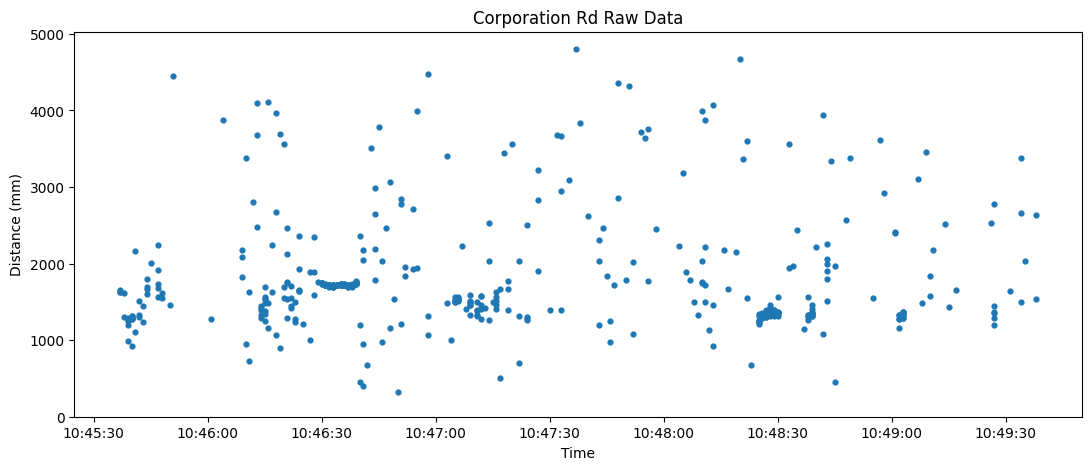

In [20]:
fig, axes = plt.subplots(1, figsize=(13, 5))
graphs.scatter_time_vs_distance(axes, timing, distances, title="Corporation Rd Raw Data")

## Cleaning Algorithm

- First, I will remove all points beyond 2.5m. As seen from my previous testing, the sensor becomes extremely accurate in daylight at measuring distances above 2.5m. Furthermore, for goal of this project, we do not need to know if cars pass the cyclist at more than 2.5m.
- Next, I want to check for points in a cluster. I will remove all distances that don't fall in within two points of other distances. A cluster must have at least 2 points or more.
- I plot two graphs, the first shows the cleaned data and it appears to be more reliable in identifying the clusters of data which may be vehicle passes.
- The second graph show the signal strength of the sensor at each measurement. It can be seen that the signal strength spikes when the points form clusters, indicating that measurements are being made when vehicles pass the sensor.

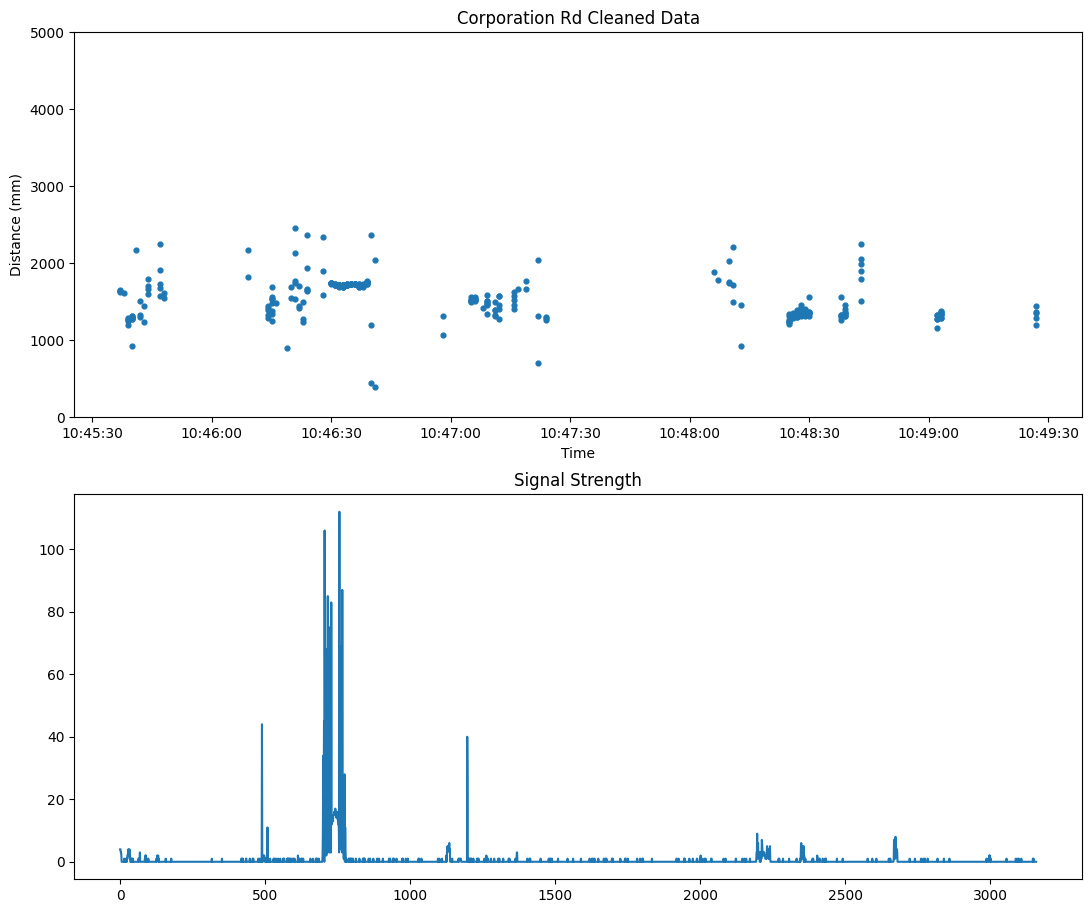

In [21]:
fig, axes = plt.subplots(2, figsize=(13, 11))

cleaned_distances = data_cleaner.clean_spurious_data(distances)
graphs.scatter_time_vs_distance(axes[0], timing, cleaned_distances, title="Corporation Rd Cleaned Data")

axes[1].plot(strength)
axes[1].set_title("Signal Strength")

plt.show()

## Cycling Tests

- Now, it was time to test the sensor on the road in real-world conditions.
- I mounted the sensor with its casing on a bike and rode it down different roads in Singapore.

### Setup

- Along with the sensor, a GoPro was attached to the bike which could be used to visually check when cars overtook the cyclist. With this, I could cross reference the data measured by the sensor and determine it's validity.
- I used the same functions for the simple outdoors tests to clean and extract the data and below, I define a few more helper functions.

### Lakeside Road

- I graph both the raw and cleaned data in two scatter plot graphs.
- From the first graph, we see how many spurious points there are and how it might be difficult to reliably determine with the sensor if a vehicle really passed the bike.
- In the second graph, I cleaned the data using the above algorithm and annotated it based on the Go Pro's recording. Again, the cleaning algorithm seems to be effective in removing spurious points and narrowing down the clusters which indicate vehicle passes.

In [22]:
LAKESIDE_RD_PATH = pathlib.Path("./data/outdoor_tests/lakeside_drive.txt")

timing, distances, strengths = get_data_from_txt(LAKESIDE_RD_PATH)
cleaned_distances = data_cleaner.clean_spurious_data(distances)

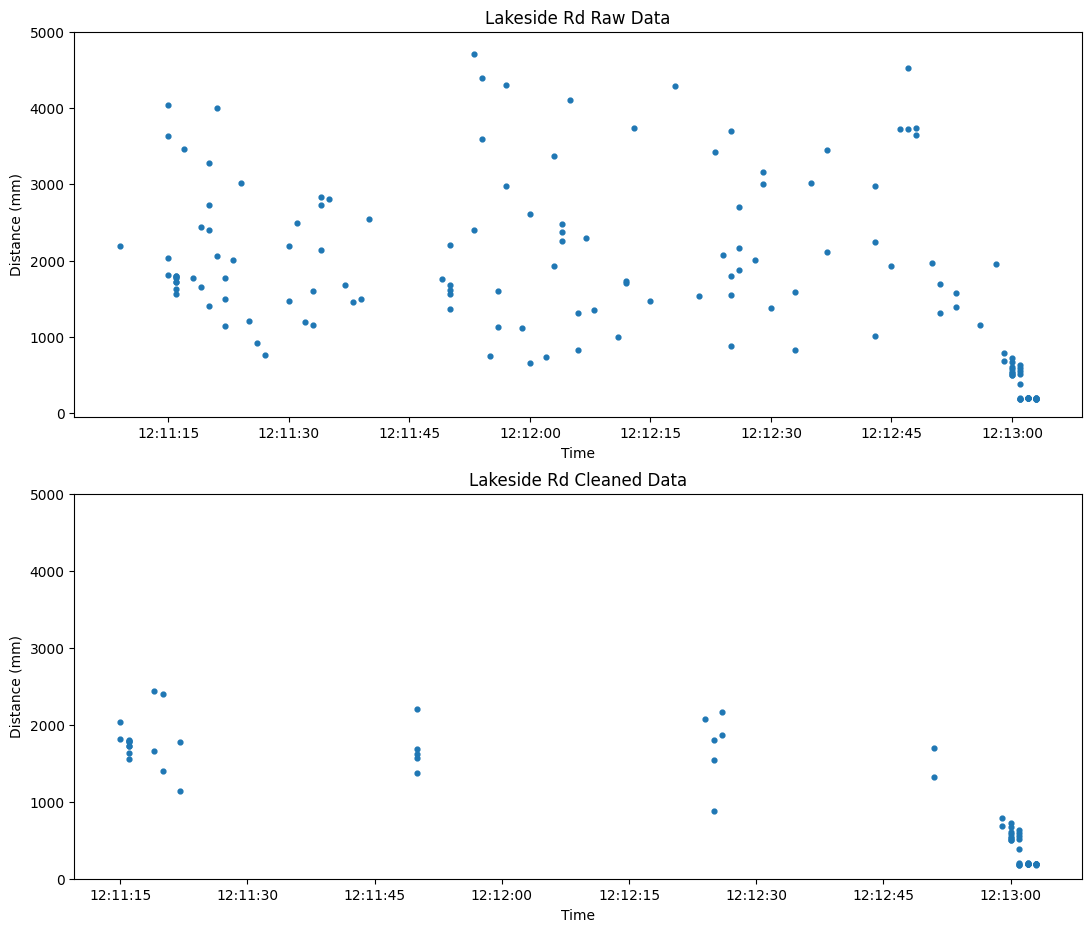

In [23]:
fig, axes = plt.subplots(2, figsize=(13, 11))

graphs.scatter_time_vs_distance(axes[0], timing, distances, title="Lakeside Rd Raw Data")
graphs.scatter_time_vs_distance(axes[1], timing, cleaned_distances, title="Lakeside Rd Cleaned Data")

plt.show()

- Below, I annotate the graph using the Gro Pro video feed to show the points at which vehicles passed the bike.
- The first set of points was created before the video feed started and before the bike started moving.
- We can see that the sensor could detect 3 passing vehicles - a moving car, a moving truck, and a stationary struck near the end. The cluster of points formed at the stationary truck is very obvious as the truck was the closest to the bike and was also not moving.
- It can also be seen that the sensor failed to detect a moving motorbike, as it was too small.
- Around 12:12:46 there are three spurious data points that weren't cleaned. They also don't look to be in a cluster.

![Lakeside Rd Annotated](./data/annotated_graphs/Lakeside_Rd.png)